In [25]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
appnope                     0.1.2
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.2.0
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.0
dask                        2022.12.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.11.0
h5py                        3.7.0
hypergeom_ufunc             NA
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2

In [75]:
adata = sc.datasets.visium_sge(sample_id="Parent_Visium_Human_BreastCancer")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

  0%|          | 0.00/11.2M [00:00<?, ?B/s]

  0%|          | 0.00/20.5M [00:00<?, ?B/s]

reading /Users/luisfcd/gitclones/SpatialFactorization/notebooks/data/Parent_Visium_Human_BreastCancer/filtered_feature_bc_matrix.h5
 (0:00:00)


/Users/luisfcd/opt/miniconda3/envs/nsf/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [76]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 1268 cells that have less than 5000 counts
filtered out 161 cells that have more than 35000 counts
#cells after MT filter: 2896
filtered out 18847 genes that are detected in less than 10 cells


/Users/luisfcd/opt/miniconda3/envs/nsf/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [77]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


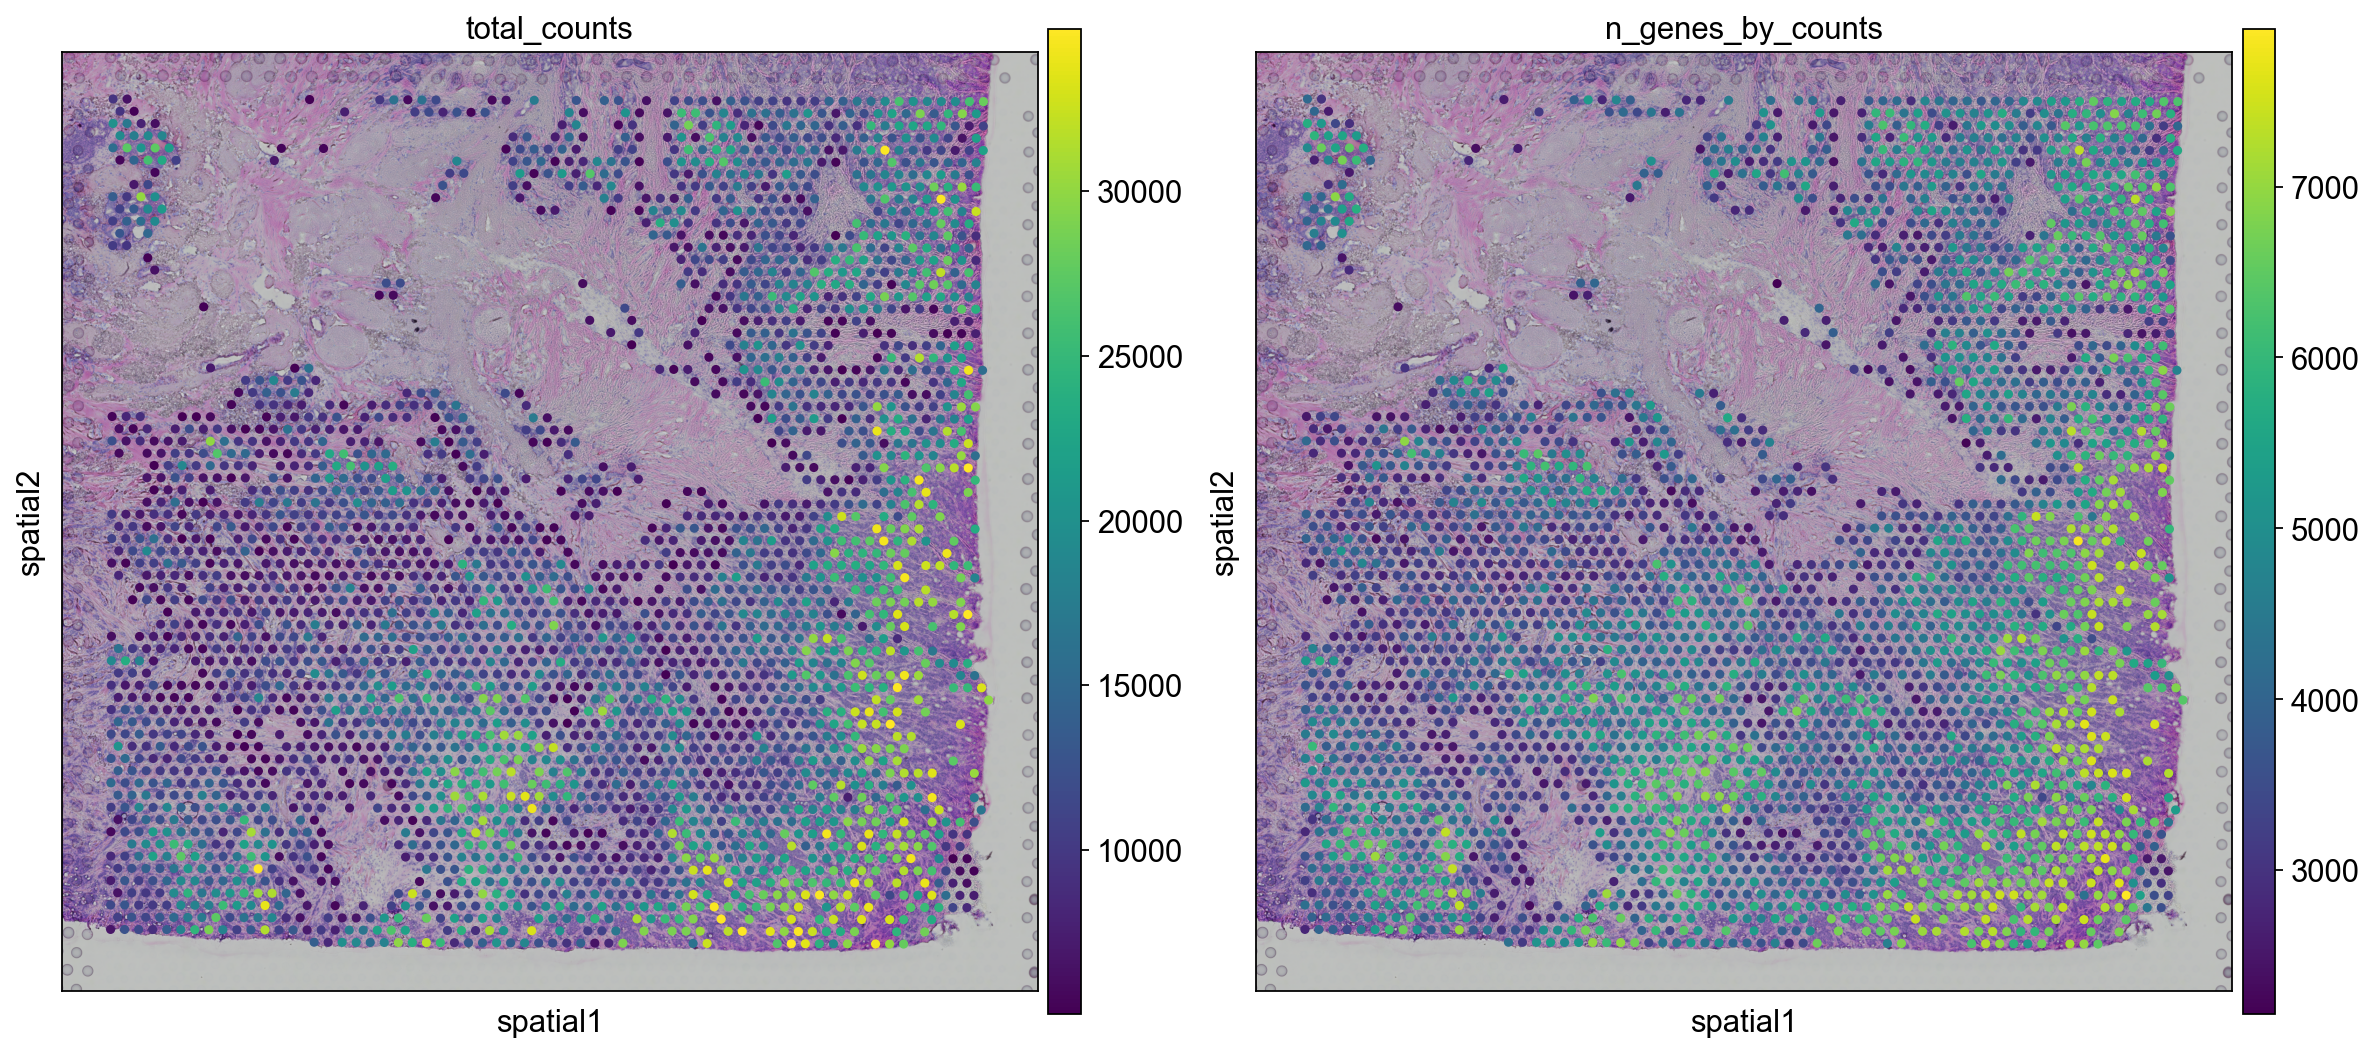

In [78]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color=["total_counts", "n_genes_by_counts"])

/var/folders/k0/dnsdn2ws5vl0xhxl_60p6pcr0000gq/T/ipykernel_78100/682204249.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


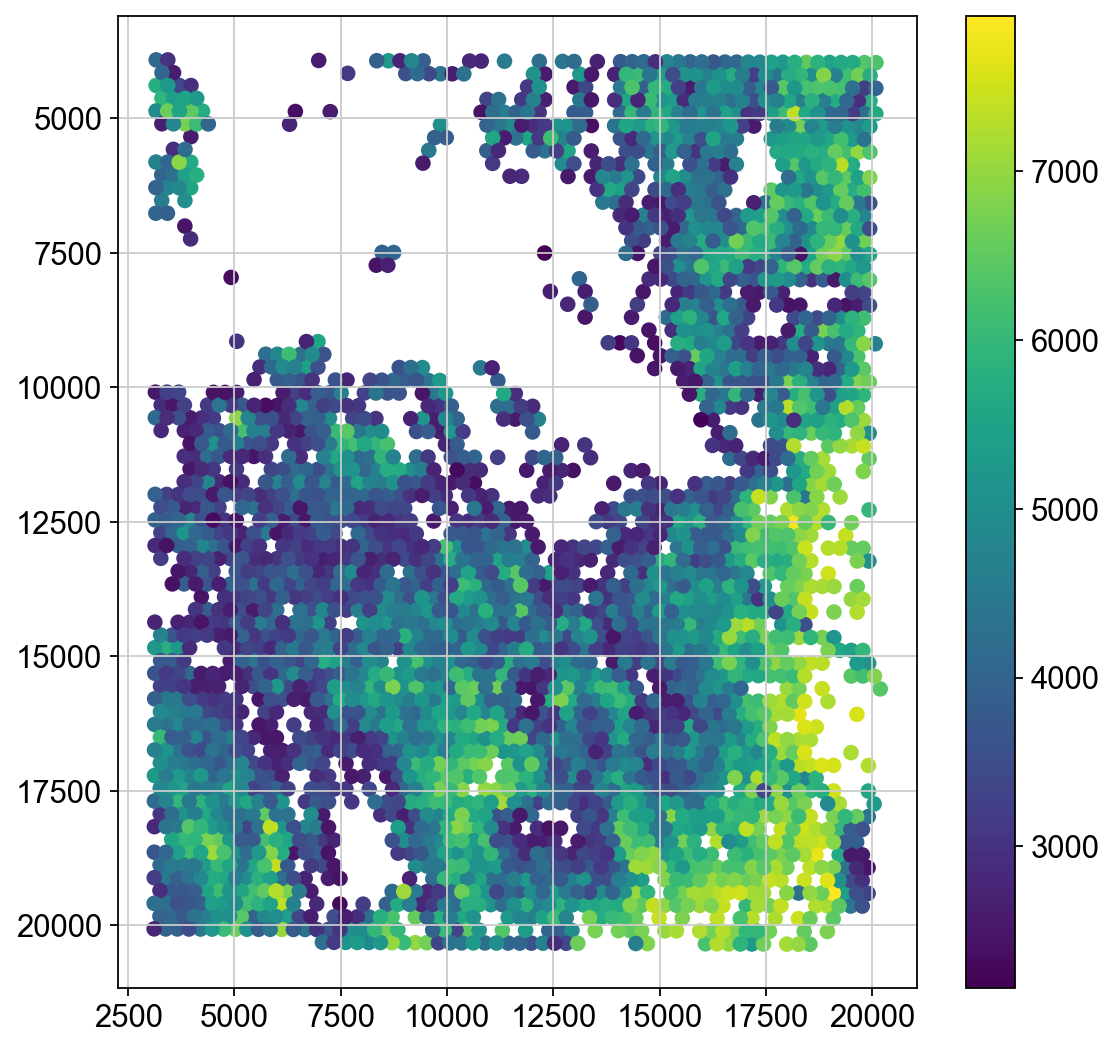

In [79]:
plt.scatter(adata.obsm['spatial'][:,0], adata.obsm['spatial'][:,1], c=adata.obs['n_genes_by_counts'])
plt.colorbar()
plt.gca().invert_yaxis()


In [80]:
adata

AnnData object with n_obs × n_vars = 2896 × 17754
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [81]:
sc.datasets.visium_sge

<function scanpy.datasets._datasets.visium_sge(sample_id: Literal['V1_Breast_Cancer_Block_A_Section_1', 'V1_Breast_Cancer_Block_A_Section_2', 'V1_Human_Heart', 'V1_Human_Lymph_Node', 'V1_Mouse_Kidney', 'V1_Adult_Mouse_Brain', 'V1_Mouse_Brain_Sagittal_Posterior', 'V1_Mouse_Brain_Sagittal_Posterior_Section_2', 'V1_Mouse_Brain_Sagittal_Anterior', 'V1_Mouse_Brain_Sagittal_Anterior_Section_2', 'V1_Human_Brain_Section_1', 'V1_Human_Brain_Section_2', 'V1_Adult_Mouse_Brain_Coronal_Section_1', 'V1_Adult_Mouse_Brain_Coronal_Section_2', 'Targeted_Visium_Human_Cerebellum_Neuroscience', 'Parent_Visium_Human_Cerebellum', 'Targeted_Visium_Human_SpinalCord_Neuroscience', 'Parent_Visium_Human_SpinalCord', 'Targeted_Visium_Human_Glioblastoma_Pan_Cancer', 'Parent_Visium_Human_Glioblastoma', 'Targeted_Visium_Human_BreastCancer_Immunology', 'Parent_Visium_Human_BreastCancer', 'Targeted_Visium_Human_OvarianCancer_Pan_Cancer', 'Targeted_Visium_Human_OvarianCancer_Immunology', 'Parent_Visium_Human_OvarianCanc